# Preparación inicial
*(Etapa: Ingest -> Data Lake)*

Generación de archivos que servirán como fuente de datos.

Se toman las descargas disponibles de Tramos y Calificaciones CCTV y se unifican en una sola fuente de datos para posterior procesamiento y depuración.

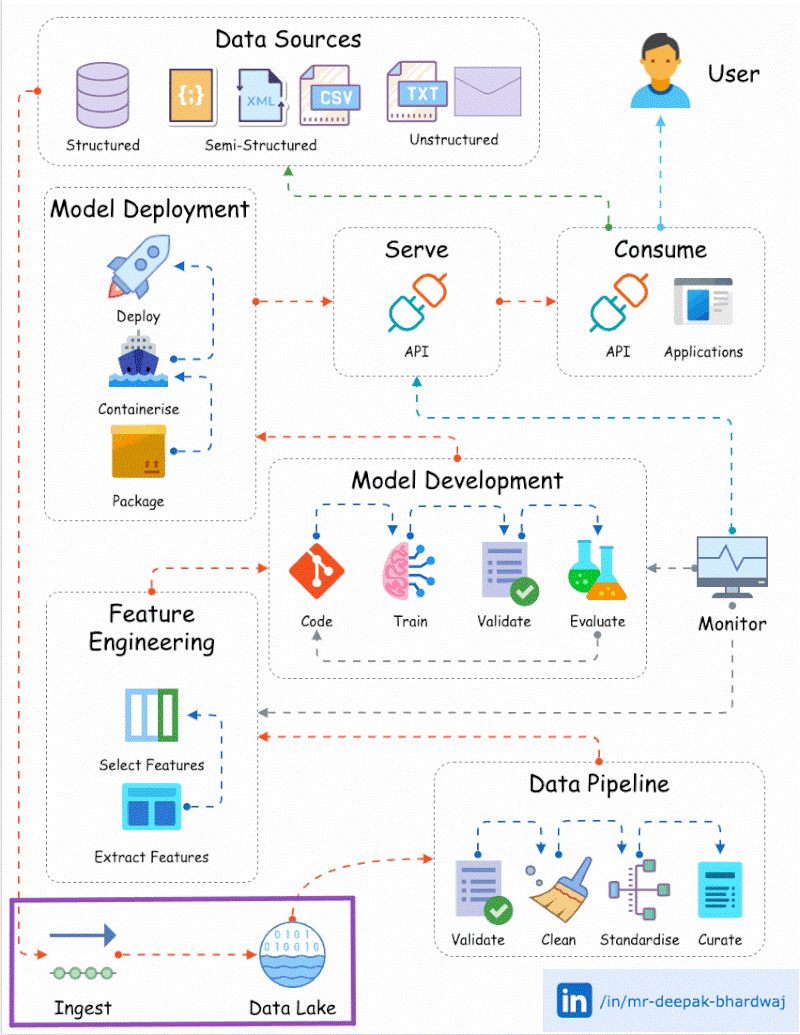

In [1]:
# Bibliotecas

import pandas as pd
import glob as gl

In [2]:
# Definiciones globales

%run ../Lib/pandas_options.py
%run ../Lib/define_constantes.py

# Archivo de tramos de tubería.

La selección de las columnas en el archivo de tramos se establece desde la descarga. El origen es el sistema SIG GEOMEDIA.

Se esperan las siguientes:

1. DIAMETRO
2. CAMARA_CAI
3. CONEXIONES
4. MATERIAL
5. TUBERIA_EL
6. VIDA_UTIL
7. FABRICANTE
8. TIPO_CIMEN
9. TIPO_SUELO
10. TIPO_RED
11. PROF_BATEA
12. PROF_BATE1
13. COTA_BATEA
14. COTA_BATE1
15. IPID
16. ESTADO
17. GRUPO
18. PROPIETARI
19. OPERADOR
20. EMPRESA
21. COD_MUNICI
22. COD_DEPART
23. COD_PAIS
24. LONGITUD
25. ARRANQUE
26. TIPO_AGUA
27. CUENCA
28. CONDICION_
29. DIAMETRO_I
30. MATERIAL_R
31. NOMBRE_COL
32. PENDIENTE
33. PROFUNDIDA
34. CAUDAL_TUB
35. CAUDAL_DIS
36. COEFICIENT
37. OBSERVACIO
38. UBICACION
39. FECHA_INST
40. COOR_LAT
41. COOR_LON
42. ESTADO_OPE
43. PAIS
44. DEPARTAMEN
45. MUNICIPIO
46. CODIGO_ARE
47. ZONA
48. CUENCA_HID


In [3]:
# Cargar archivo de tramos de tubería a un dataframe de PANDAS

archivo_tramos = f'{DIRECTORIO_DATOS_CRUDOS}/DATOS_TRAMOS.csv'
df_tramos = pd.read_csv(archivo_tramos, low_memory=False)

In [4]:
# Visualizar resultado de la carga de tramos

print(df_tramos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171197 entries, 0 to 171196
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   G3E_FID                      171197 non-null  int64  
 1   DIAMETRO                     171197 non-null  int64  
 2   CAMARA_CAIDA                 171197 non-null  object 
 3   CONEXIONES_ERRADAS           171132 non-null  object 
 4   MATERIAL                     171197 non-null  object 
 5   TUBERIA_ELEVADA              171197 non-null  object 
 6   VIDA_UTIL                    166700 non-null  float64
 7   FABRICANTE                   171151 non-null  object 
 8   TIPO_CIMENTACION             69415 non-null   object 
 9   TIPO_SUELO                   57985 non-null   object 
 10  TIPO_RED                     171197 non-null  object 
 11  PROF_BATEA_ENTRADA           170837 non-null  float64
 12  PROF_BATEA_SALIDA            170733 non-null  float64
 13 

In [7]:
# Cargar datos de CCTV - Se carga último archivo enviado por Lina Cano

lista_archivos_cctv = gl.glob(f'{DIRECTORIO_DATOS_CRUDOS}/DATOSCCTV*.csv')

# Solo se requiere Ipid, GradoCalificacionPrincipal y Fecha
lista_dfs_cctv = [
    pd.read_csv(
        archivo,
        usecols=['Ipid', 'Ifid','GradoCalificacionPrincipal', 'Fecha'],
    ) for archivo in lista_archivos_cctv
]

print([df.info() for df in lista_dfs_cctv])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ipid                        29222 non-null  int64  
 1   Ifid                        29222 non-null  int64  
 2   GradoCalificacionPrincipal  28859 non-null  float64
 3   Fecha                       29222 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 913.3+ KB
[None]


In [10]:
# Unificar dataframes de CCTV en uno solo y renombrar columnas

df_calificaciones = pd.concat(lista_dfs_cctv).rename(
    columns={'Ipid': 'IPID', 'Ifid': 'G3E_FID', 'GradoCalificacionPrincipal': 'CALIFICACION', 'Fecha': 'FECHA_CALIFICACION'}
)

print(df_calificaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IPID                29222 non-null  int64  
 1   G3E_FID             29222 non-null  int64  
 2   CALIFICACION        28859 non-null  float64
 3   FECHA_CALIFICACION  29222 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 913.3+ KB
None


In [15]:
# Consolidar tramos calificados

df_tramos_calificados = df_tramos.merge(df_calificaciones, on='G3E_FID')
print(df_tramos_calificados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25004 entries, 0 to 25003
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   G3E_FID                      25004 non-null  int64  
 1   DIAMETRO                     25004 non-null  int64  
 2   CAMARA_CAIDA                 25004 non-null  object 
 3   CONEXIONES_ERRADAS           25004 non-null  object 
 4   MATERIAL                     25004 non-null  object 
 5   TUBERIA_ELEVADA              25004 non-null  object 
 6   VIDA_UTIL                    24649 non-null  float64
 7   FABRICANTE                   24992 non-null  object 
 8   TIPO_CIMENTACION             12404 non-null  object 
 9   TIPO_SUELO                   11842 non-null  object 
 10  TIPO_RED                     25004 non-null  object 
 11  PROF_BATEA_ENTRADA           24987 non-null  float64
 12  PROF_BATEA_SALIDA            24964 non-null  float64
 13  COTA_BATEA_ABAJO

In [17]:
# Guardar consolidación de tramos calificados ("Data Lake")

archivo_tramos_calificados = f'{DIRECTORIO_DATOS_PREPROCESADOS}/TRAMOSCALIFICADOS.csv'
df_tramos_calificados.to_csv(archivo_tramos_calificados, index=False)